In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def Generate_Dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 return x_batch, y_batch

In [9]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_Prediction = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_Prediction - y))

  return x, y, y_Prediction, loss

In [17]:
def run():
  x_batch, y_batch = Generate_Dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(30):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('\n\t\t|-- Predicting Graph --|')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)
  plt.savefig('plot.png')

0 loss: 2.9158762
1 loss: 1.0889847
2 loss: 0.50172037
3 loss: 0.30803785
4 loss: 0.23961996
5 loss: 0.21135356
6 loss: 0.19622229
7 loss: 0.18563432
8 loss: 0.176842
9 loss: 0.16895226
10 loss: 0.1616615
11 loss: 0.15485425
12 loss: 0.1484759
13 loss: 0.14249223
14 loss: 0.13687655
15 loss: 0.1316055
16 loss: 0.12665768
17 loss: 0.12201322
18 loss: 0.11765348
19 loss: 0.11356102
20 loss: 0.109719425
21 loss: 0.10611334
22 loss: 0.10272834
23 loss: 0.099550836
24 loss: 0.09656811
25 loss: 0.09376825
26 loss: 0.09114004
27 loss: 0.08867291
28 loss: 0.08635705
29 loss: 0.08418317

		|-- Predicting Graph --|


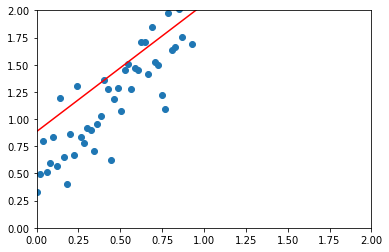

In [18]:
run()